<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Third-Wave-Prediction/blob/main/Covid_19_Third_Wave_Prediction_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Required Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing 

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 9.5 MB 38.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import plotly.express as ply
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import numpy as np
import statistics
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
import datetime as datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import  sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
#pip install statsmodels --upgrade
!pip install statsmodels
!pip3 install --user scipy==1.2.0

     |████████████████████████████████| 26.6 MB 64 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 1.8.2 requires scipy>=1.3.2, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from pmdarima import auto_arima

# Loading The Data

In [ ]:
df=pd.read_csv("covid_19_india.csv")

In [ ]:
df_corona_in_india = pd.read_csv("covid_19_india.csv")


In [ ]:
df.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.tail(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

# Importing the metrics

In [ ]:
import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Indexing the Data

In [ ]:
df.set_index('Date',inplace=True)

# Resampling the Data by month and Date

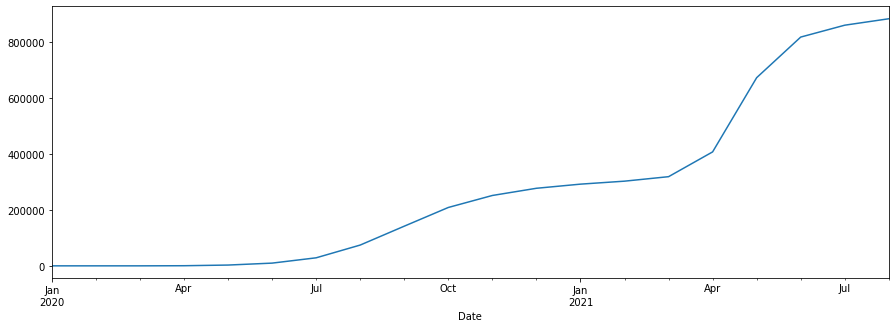

In [ ]:
df['Confirmed'].resample(rule='M').mean().plot(figsize=(15,5))

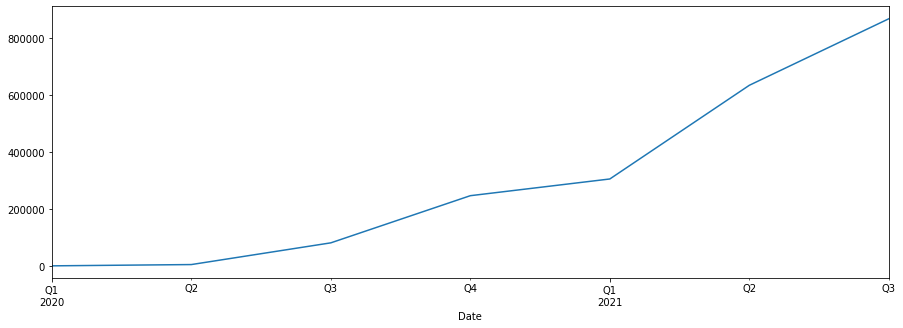

In [ ]:
df['Confirmed'].resample(rule='Q').mean().plot(figsize=(15,5))


# Dropping the unnecessary columns

In [ ]:
df1=pd.DataFrame()
df1=df.drop(columns=['Sno','Time','ConfirmedIndianNational','State/UnionTerritory','ConfirmedForeignNational','Cured','Deaths'])

<Figure size 432x288 with 0 Axes>

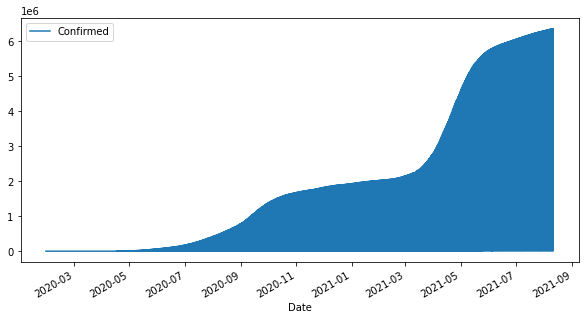

In [ ]:
 plt.savefig('Confirmed.png', dpi=300)
df1.plot(figsize=(10,5))


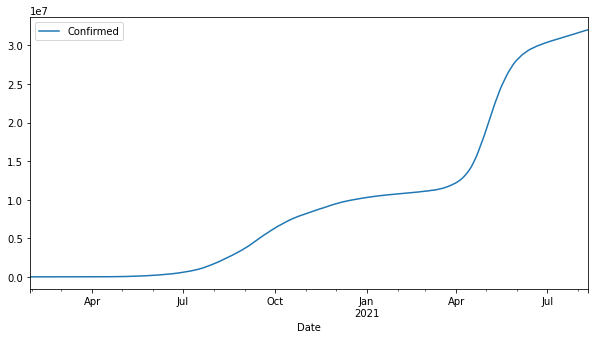

In [ ]:
df_day=df1.resample('D').sum()
df_day.plot(figsize=(10,5))

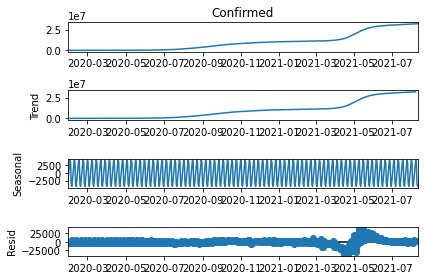

<Figure size 576x216 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_day['Confirmed'])
result.plot()
fig = plt.figure(figsize=(8, 3))
fig.show()

# Checking the Stationarity in the Data

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.Rolling.mean(timeseries, window=24)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.Rolling.std(timeseries, window=24)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
              dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

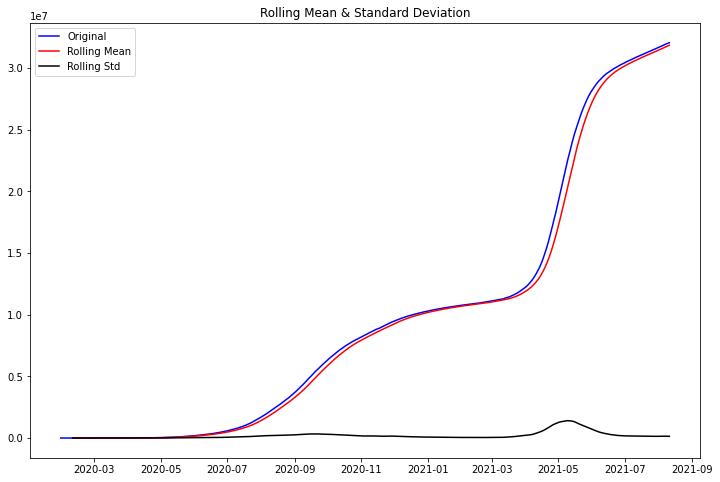

Test Statistic                   0.898771
p-value                          0.993074
#Lags Used                      17.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)            -2.569618
dtype: float64


In [ ]:
test_stationarity(df_day['Confirmed'])


# Applying log values to the Data

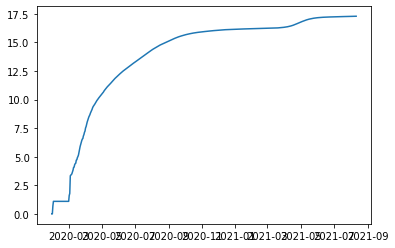

In [ ]:
import numpy as np
log_df = np.log(df_day)
plt.plot(log_df)

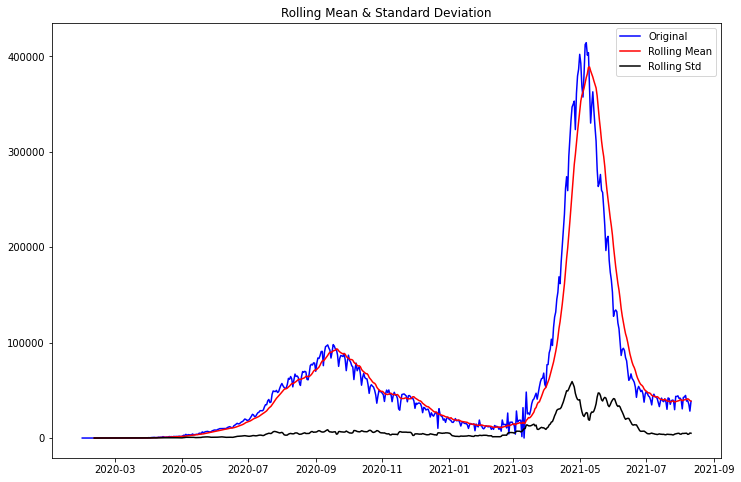

Test Statistic                  -3.151168
p-value                          0.022991
#Lags Used                      16.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)            -2.569618
dtype: float64


In [ ]:
df_day['diff1']=df_day['Confirmed']-df_day['Confirmed'].shift(1)
test_stationarity(df_day['diff1'].dropna())


# Plotting acf and pacf to find the stationarity in the data

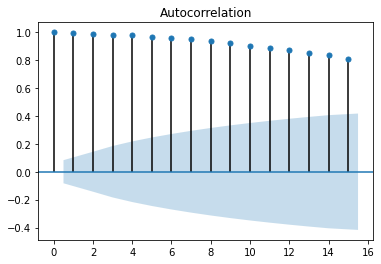

In [ ]:
plot_acf(df_day['diff1'].dropna(),lags=15)
plt.show()

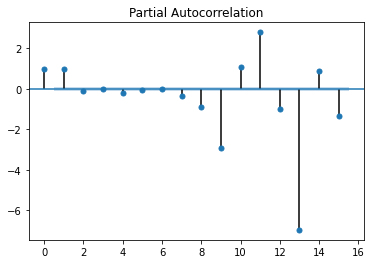

In [ ]:
plot_pacf(df_day['diff1'].dropna(),lags=15)
plt.show()

# Differencing the Data

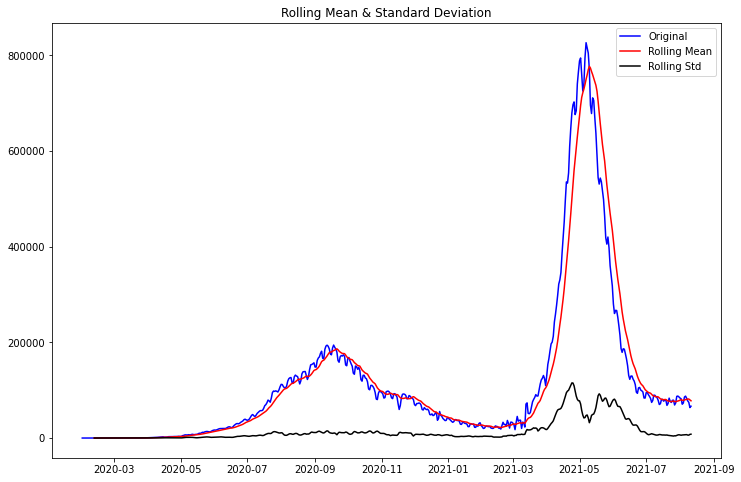

Test Statistic                  -2.592978
p-value                          0.094457
#Lags Used                      19.000000
Number of Observations Used    538.000000
Critical Value (1%)             -3.442563
Critical Value (5%)             -2.866927
Critical Value (10%)            -2.569639
dtype: float64


In [ ]:
df_day['diff2']=df_day['Confirmed']-df_day['Confirmed'].shift(2)
test_stationarity(df_day['diff2'].dropna())


# Importing the Arima Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


# Trying to find the best find arima model with the help of auto arima

In [ ]:
auto_arima_model=auto_arima(df_day['Confirmed'],trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=11575.466, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11605.851, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11605.878, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=11605.872, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=11567.710, Time=0.44 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=11607.860, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=11573.171, Time=0.21 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=11632.525, Time=0.38 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=11602.443, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=11607.151, Time=0.48 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=11571.204, Time=0.84 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=11569.583, Time=0.96 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 4.169 seconds


In [ ]:
#Best Model 
arima_model_202 = ARIMA(df_day['Confirmed'].dropna(), order=(1,2,2)).fit()

# Plotting the arima model statistics

In [ ]:
arima_model_202.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  560
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5779.855
Date:                Thu, 19 Aug 2021   AIC                          11567.710
Time:                        17:28:14   BIC                          11585.008
Sample:                    01-30-2020   HQIC                         11574.465
                         - 08-11-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9615      0.011     88.563      0.000       0.940       0.983
ma.L1         -1.0398      0.019    -53.939      0.000      -1.078      -1.002
ma.L2          0.1576      0.021      7.355      0.000       0.116       0.200
sigma2      6.337e+07   6.81e-11   9.31e+17      0.000    6.34e+07    6.34e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):              1223.63
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):             122.48   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.02e+34. Standard errors may be unstable.
"""

In [ ]:
start = df_day.index.get_loc('2020-05-1')
end = df_day.index.get_loc('2021-05-28')
print(start,'to',end)

92 to 484


# Predict the unseen Data using the best fit arima model we got using auto arima

In [ ]:
 predict_1= arima_model_202.predict(start=start+1 ,end=end+1, dynamic= False)  

# Forecasting the occurence of third wave in India with the help of Arima model

In [ ]:
#Trying to forecast future 180 values
pred_future_10101=arima_model_202.predict(start=len(df_day)+1,end=len(df_day)+(180),dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))

The length of pred_future values : 180


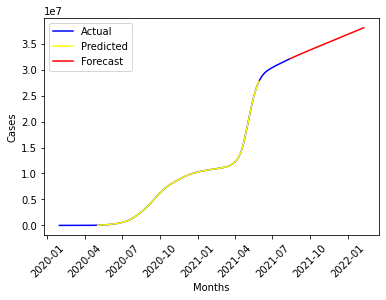

<Figure size 1080x360 with 0 Axes>

In [ ]:
plt.plot(df_day['Confirmed'],color='blue')
plt.plot(predict_1,color='yellow')
plt.plot(pred_future_10101,color='red')
plt.xticks(rotation=45)
plt.xlabel("Months")
plt.ylabel("Cases")
plt.legend(['Actual','Predicted', 'Forecast'])
fig = plt.figure(figsize=(15, 5))
fig.show()


# Data preprocessing

In [ ]:
df_corona_in_india.isnull().sum()


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
df_corona_in_india['Deaths']=pd.to_numeric(df_corona_in_india['Deaths'])

# Data Visualization

# The first plot suggests that there is a constant increase in the total number of cases in India

In [ ]:
#Total cases of corona in India
df_corona_in_india['Total Cases'] = df_corona_in_india['Cured'] + df_corona_in_india['Deaths'] + df_corona_in_india['Confirmed']
#Active cases of corona in India
df_corona_in_india['Active Cases'] = df_corona_in_india['Total Cases'] - df_corona_in_india['Cured'] - df_corona_in_india['Deaths']
df_corona_in_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,3


In [ ]:
df_corona_in_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
 9   Total Cases               18110 non-null  int64 
 10  Active Cases              18110 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
df_corona_in_india['Date'] =pd.to_datetime(df_corona_in_india.Date,dayfirst=True)


# The following plot gives information about the occurence total number of cases in India categorized by statewise

In [ ]:
#Total Cases in Indian States Datewise
corona_data = df_corona_in_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
fig = px.bar(corona_data, y='Total Cases', x='Date',hover_data =['State/UnionTerritory','Active Cases','Deaths','Cured'], color='Total Cases',barmode='group', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Indian States with Current Total Corona Cases')
fig.show()

# The following plot gives information about the number of persons thay were being cured Daily in India categorized by Datewise

In [ ]:
#Daily Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)

fig = px.bar(corona_data, y='Cured', x='Date',hover_data =['Cured'], color='Cured', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Cured Cases in India Datewise')
fig.show()

# The following plot gives information about the number of deaths that were being occured Daily in India categorized by Datewise

In [ ]:
#Daily Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)
fig = px.bar(corona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Daily Cases in India Datewise')
fig.show()

In [ ]:
#Total Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
fig = px.bar(corona_data, y='Total Cases', x='Date',hover_data =['Total Cases'], color='Total Cases', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(title='Total Cases in India Datewise')
fig.show()

# The following plot gives information about the growth in the percentage of occurence of new cases compared to the previous day

In [ ]:
# pct_change is used to obtain the percentage change in consecutive rows.
corona_data['Corona Growth Rate'] = corona_data['Total Cases'].pct_change().mul(100).round(2)
#Corona Growth Rate Comparison with Previous Day
fig = px.bar(corona_data, y='Corona Growth Rate', x='Date',hover_data =['Corona Growth Rate','Total Cases'], height=600,color_continuous_scale=["blue","red"])
fig.update_layout(title='Corona Growth Rate(in Percentage) Comparison with Previous Day')
fig.show()

# The following graph gives information about the mortality rate in India

In [ ]:
#Moratality Rate
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases','Active Cases','Deaths'].sum().reset_index().sort_values('Date',ascending=False)
corona_data['Mortality Rate'] = ((corona_data['Deaths']/corona_data['Total Cases'])*100) #(Death/ total cases)*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Mortality Rate'],mode='lines+markers',name='Cases',marker_color='red'))
fig.update_layout(title_text='COVID-19 Mortality Rate in INDIA',plot_bgcolor='rgb(225,230,255)' ,xaxis_title="Date",
    yaxis_title="Mortality Rate")
fig.show()

In [ ]:
#DAILY DEATHS IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
corona_data['DAILY DEATHS'] = corona_data['Deaths'].sub(corona_data['Deaths'].shift())
corona_data['DAILY DEATHS'].iloc[0] = corona_data['Deaths'].iloc[0]
corona_data['DAILY DEATHS'] = corona_data['DAILY DEATHS'].astype(int)
fig = px.bar(corona_data, y='DAILY DEATHS', x='Date',hover_data =['DAILY DEATHS'], color='DAILY DEATHS', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DAILY DEATHS IN INDIA')
fig.show()

In [ ]:
#DAILY DEATHS IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
fig = px.bar(corona_data, y='Deaths', x='Date',hover_data =['Deaths'], color='Deaths', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DEATHS IN INDIA')
fig.show()

#  The plot gives info about the Recovery rate In India

In [ ]:
#Recovery Rate
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases','Active Cases','Cured'].sum().reset_index().sort_values('Date',ascending=False)
corona_data['Recovery Rate'] = ((corona_data['Cured']/corona_data['Total Cases'])*100)
fig = go.Figure()
corona_data = corona_data[3:]
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Recovery Rate'],
                    mode='lines+markers',name='Cases',marker_color='green'))


fig.update_layout(title_text='COVID-19 Recovery Rate in INDIA',plot_bgcolor='rgb(225,230,255)',xaxis_title="Date",
    yaxis_title="Recovery Rate")
fig.show()

#  The plot gives info about the Recovery rate In India DateWise

In [ ]:
#DAILY Recovery IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)
corona_data['DAILY RECOVERY'] = corona_data['Cured'].sub(corona_data['Cured'].shift())
corona_data['DAILY RECOVERY'].iloc[0] = corona_data['Cured'].iloc[0]
corona_data['DAILY RECOVERY'] = corona_data['DAILY RECOVERY'].astype(int)
fig = px.bar(corona_data, y='DAILY RECOVERY', x='Date',hover_data =['DAILY RECOVERY'], color='DAILY RECOVERY', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DAILY RECOVERY IN INDIA')
fig.show()

In [ ]:
#Total Cases in Indian States Datewise
corona_data = df_corona_in_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
fig = px.bar(corona_data, y='Total Cases', x='Date',hover_data =['State/UnionTerritory','Active Cases','Deaths','Cured'], color='Total Cases',barmode='group', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Indian States with Current Total Corona Cases')
fig.show()

#  The following plot gives information about the total cases and active cases and deaths and the amount of persons that were cured from coronavirus

In [ ]:
#Total Cases,Active Cases,Cured,Deaths from Corona Virus in India
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases','Active Cases','Cured','Deaths'].sum().reset_index().sort_values('Date',ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Total Cases'],
                    mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Active Cases'], 
                mode='lines+markers',name='Active Cases'))
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Cured'], 
                mode='lines+markers',name='Cured'))
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Deaths'], 
                mode='lines+markers',name='Deaths'))
fig.update_layout(title_text='Curve Showing Different Cases from COVID-19 in India',plot_bgcolor='rgb(225,230,255)')
fig.show()